In [1]:
import os
import sys
os.chdir('..')
sys.path.append(os.getcwd())

In [2]:
import torch
from Models.pretrain import *
from Models.cPB import cPB
import torch.nn.functional as F
import numpy as np
import pandas as pd
import pickle
import argparse
from torch.autograd import Variable
import pprint
import copy
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='torch.storage')
warnings.filterwarnings("ignore", category=UserWarning, module='torch.storage')
warnings.filterwarnings("ignore", category=DeprecationWarning, module='torch.storage')

# SINE datasets


## CONFIGURATION:


In [3]:
base_model = 'GRU'
batch_size = 128
hidden_size = 50
seq_len = 10
epoch_size=10
lr = 0.01
number_of_tasks=4
mask_selection_NofBatch = 50
input_size=2
iteration=1
mask_init='uniform'
dataset='SINE'
dataset_name = "sine_rw10_mode5_extended_16-16_1234"
Pretrain_task = '1'

df = pd.read_csv(os.path.join(f"datasets/{dataset}/", f"{dataset_name}.csv"))
pretrain_model_addr=f'Performance/Pretrain/GRU/{dataset}/After/sine-6_6-1234-t{Pretrain_task}-{base_model}-pretrain-hidden{hidden_size}-epoch10_itter{iteration}.pickle'
mask_weights=[] #if we have initial masks then reload it here


mask_option = 'DOT'
model_type = 'CPB'
batch_first = True
low_rank = False

## Executable code:


list of accuracies that used for evaluating and selecting the models =  [0.7196875]
list of kappa values that used for evaluating and selecting the models =  [0.43663979]
index of selcted mask for this task 0
All batches Accuracy=  0.8498206967213116
All batches cohen kappa=  0.6981000064444713
list of accuracies that used for evaluating and selecting the models =  [0.7865625  0.74484375]
list of kappa values that used for evaluating and selecting the models =  [0.57007788 0.49730189]
index of selcted mask for this task 0
All batches Accuracy=  0.826767418032787
All batches cohen kappa=  0.6524490111003645
list of accuracies that used for evaluating and selecting the models =  [0.7353125  0.770625   0.72921875]
list of kappa values that used for evaluating and selecting the models =  [0.47599157 0.54307311 0.46546381]
index of selcted mask for this task 1
All batches Accuracy=  0.8850281762295082
All batches cohen kappa=  0.7671991743177908
list of accuracies that used for evaluating a

/Users/reza/Documents/GitHub/cPB/Models/cPB.py:405: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


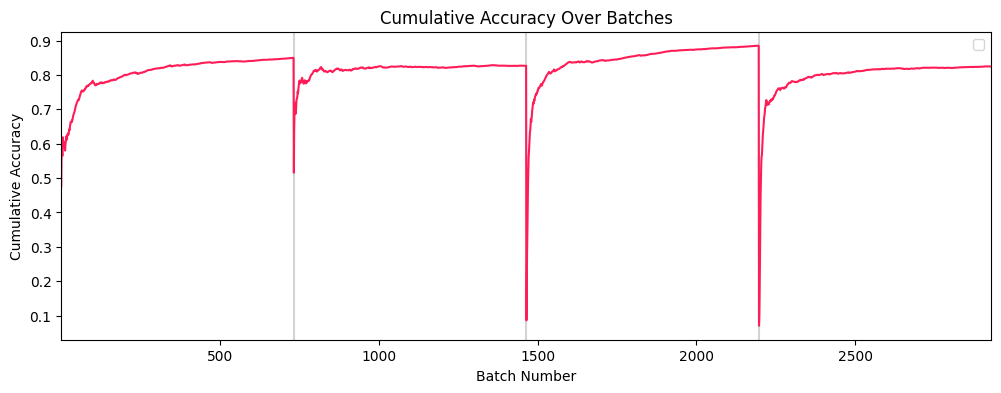

/Users/reza/Documents/GitHub/cPB/Models/cPB.py:422: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


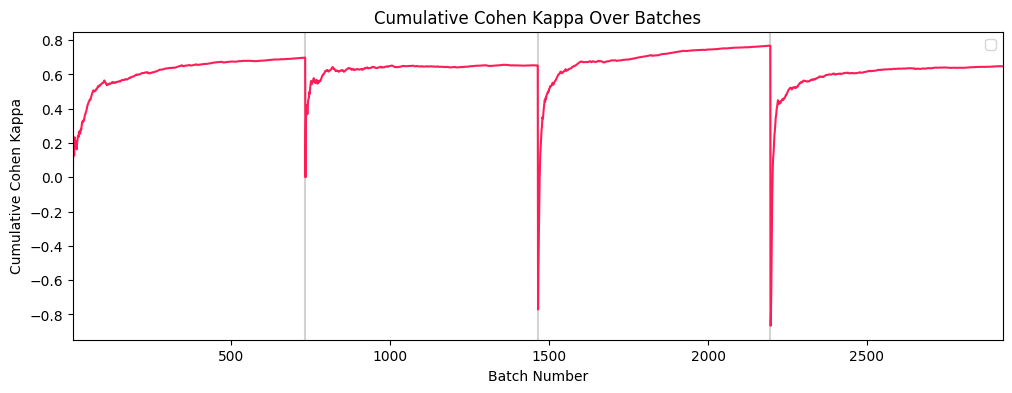

In [4]:
model=cPB(lr = lr ,hidden_size = hidden_size, seq_len = seq_len,base_model = base_model, pretrain_model_addr = pretrain_model_addr,
           mask_weights = mask_weights, mask_init = mask_init, number_of_tasks = number_of_tasks, epoch_size = epoch_size,
           input_size = input_size, mask_option = mask_option, model_type = model_type, batch_first = batch_first, low_rank = low_rank)


for iter in range(0,iteration):
  # loop for each task
  for task in range(1, df["task"].max() + 1):
    df_task = df[df["task"] == task]
    df_task = df_task.drop(columns="task")
    # loop based on each batch of data
    batch_cont=0
    model.weights_copy(task)
    for i in range(0, len(df_task), batch_size):
      x = df_task.iloc[i : i + batch_size, 0:-1].values.astype(np.float32)
      y = list(df_task.iloc[i : i + batch_size, -1])
      if batch_cont<mask_selection_NofBatch:
        for mask_index in range (0, task):
          model.predict_many(x,y,mask_index,task,mask_selection=True)
          model.learn_many(x,y,mask_index)
        batch_cont+=1
      elif batch_cont==mask_selection_NofBatch:
        best_mask_index=model.add_new_column(task)
        model.predict_many(x,y,best_mask_index,task,mask_selection=False)
        model.learn_many(x,y,best_mask_index)
        batch_cont+=1
      elif batch_cont>mask_selection_NofBatch:
        batch_cont+=1
        model.predict_many(x,y,best_mask_index,task,mask_selection=False)
        model.learn_many(x,y,best_mask_index)
    model.save_final_metrics(task,best_mask_index)
    model.final_weights_saving()
  model.plotting()


file_path = f'Performance/Results/cPB/{dataset}/Periodic/pretrain-T{Pretrain_task}_{base_model}-{dataset_name}-hidden{hidden_size}-epoch10_iter{iteration}.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(model.performance, file)

file_path = f'Performance/Results/cPB/{dataset}/Periodic/pretrain-T{Pretrain_task}_{base_model}-{dataset_name}-hidden{hidden_size}-epoch10_iter{iteration}_selectedMask.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(model.selected_mask_index, file)


hidden_size 50
list of accuracies that used for evaluating and selecting the models =  [0.728125]
list of kappa values that used for evaluating and selecting the models =  [0.46243829]
index of selcted mask for this task 0
All batches Accuracy=  0.8657018442622951
All batches cohen kappa=  0.7300263510945716
list of accuracies that used for evaluating and selecting the models =  [0.754375  0.7146875]
list of kappa values that used for evaluating and selecting the models =  [0.50823399 0.43696621]
index of selcted mask for this task 0
All batches Accuracy=  0.8229465505464482
All batches cohen kappa=  0.6445585491512317
list of accuracies that used for evaluating and selecting the models =  [0.77078125 0.7653125  0.75734375]
list of kappa values that used for evaluating and selecting the models =  [0.5471157  0.53087247 0.51839529]
index of selcted mask for this task 0
All batches Accuracy=  0.892155481557377
All batches cohen kappa=  0.7828171402648539
list of accuracies that used for 

/Users/reza/Documents/GitHub/cPB/Models/cPB.py:272: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


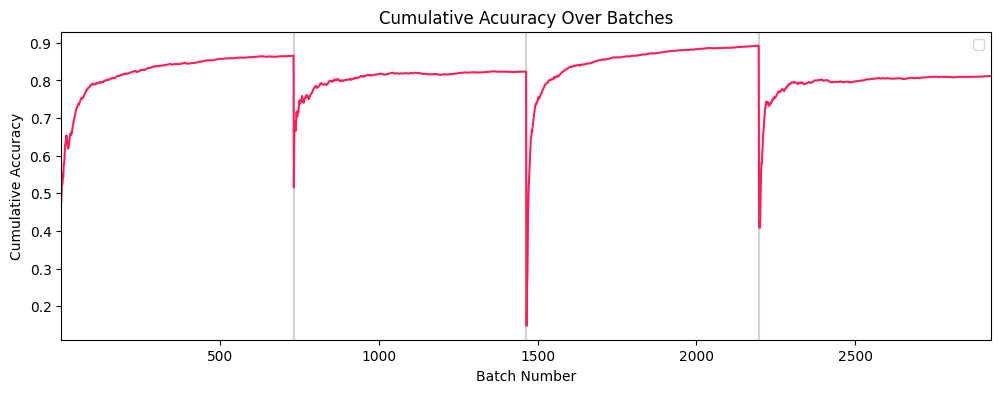

/Users/reza/Documents/GitHub/cPB/Models/cPB.py:289: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


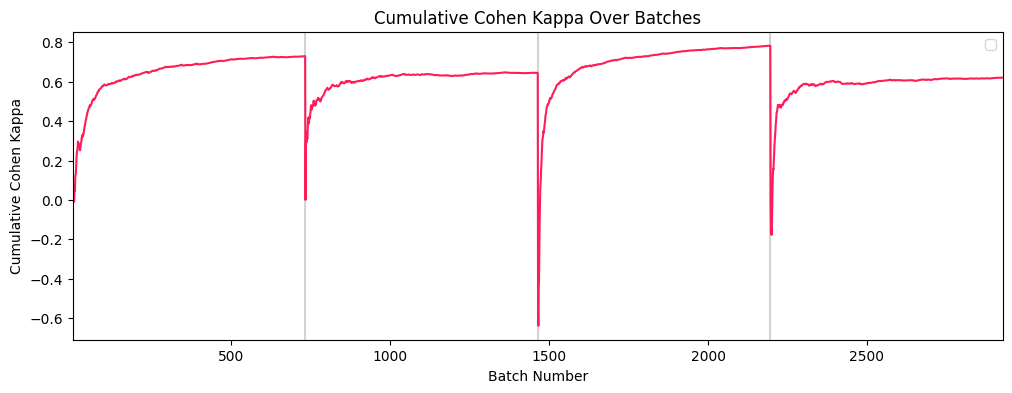

In [4]:
model=cPB(lr = lr ,hidden_size = hidden_size, seq_len = seq_len,base_model = base_model, pretrain_model_addr = pretrain_model_addr,
           mask_weights = mask_weights, mask_init = mask_init, number_of_tasks = number_of_tasks, epoch_size = epoch_size,
           input_size = input_size, mask_option = mask_option, model_type = model_type, batch_first = batch_first)


for iter in range(0,iteration):
  # loop for each task
  for task in range(1, df["task"].max() + 1):
    df_task = df[df["task"] == task]
    df_task = df_task.drop(columns="task")
    # loop based on each batch of data
    batch_cont=0
    model.weights_copy(task)
    for i in range(0, len(df_task), batch_size):
      x = df_task.iloc[i : i + batch_size, 0:-1].values.astype(np.float32)
      y = list(df_task.iloc[i : i + batch_size, -1])
      if batch_cont<mask_selection_NofBatch:
        for mask_index in range (0, task):
          model.predict_many(x,y,mask_index,task,mask_selection=True)
          model.learn_many(x,y,mask_index)
        batch_cont+=1
      elif batch_cont==mask_selection_NofBatch:
        best_mask_index=model.add_new_column(task)
        model.predict_many(x,y,best_mask_index,task,mask_selection=False)
        model.learn_many(x,y,best_mask_index)
        batch_cont+=1
      elif batch_cont>mask_selection_NofBatch:
        batch_cont+=1
        model.predict_many(x,y,best_mask_index,task,mask_selection=False)
        model.learn_many(x,y,best_mask_index)
    model.save_final_metrics(task,best_mask_index)
    model.final_weights_saving()
  model.plotting()


file_path = f'Performance/Results/cPB/{dataset}/Periodic/pretrain-T{Pretrain_task}_{base_model}-{dataset_name}-hidden{hidden_size}-epoch10_iter{iteration}.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(model.performance, file)

file_path = f'Performance/Results/cPB/{dataset}/Periodic/pretrain-T{Pretrain_task}_{base_model}-{dataset_name}-hidden{hidden_size}-epoch10_iter{iteration}_selectedMask.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(model.selected_mask_index, file)


# Weather datasets


## CONFIGURATION:


In [9]:
base_model = 'GRU'
batch_size = 128
hidden_size = 50
seq_len = 11
epoch_size=10
lr = 0.01
number_of_tasks=4
mask_selection_NofBatch = 50
input_size=4
iteration=1
mask_init='uniform'
dataset='Weather'
dataset_name = "weather_st124_1conf"
Pretrain_task = '1'

df = pd.read_csv(os.path.join(f"datasets/{dataset}/", f"{dataset_name}.csv"))
pretrain_model_addr=f'Performance/Pretrain/{base_model}/{dataset}/After/{dataset}-{base_model}-pretrain-hidden{hidden_size}-epoch10_itter{iteration}.pickle'
mask_weights=[] #if we have initial masks then reload it here

mask_option = 'SUM'
model_type = 'cPB'
batch_first = True
low_rank = False



## Executable code:


list of accuracies that used for evaluating and selecting the models =  [0.81484375]
list of kappa values that used for evaluating and selecting the models =  [0.62824947]
index of selcted mask for this task 0
All batches Accuracy=  0.8327824072352765
All batches cohen kappa=  0.663312218083841
list of accuracies that used for evaluating and selecting the models =  [0.82953125 0.8534375 ]
list of kappa values that used for evaluating and selecting the models =  [0.64942237 0.69950156]
index of selcted mask for this task 1
All batches Accuracy=  0.8736731298334324
All batches cohen kappa=  0.7449967041157368
list of accuracies that used for evaluating and selecting the models =  [0.65046875 0.67578125 0.70328125]
list of kappa values that used for evaluating and selecting the models =  [0.29624049 0.34482465 0.40323409]
index of selcted mask for this task 2
All batches Accuracy=  0.8129351251115408
All batches cohen kappa=  0.6197784574838673
list of accuracies that used for evaluating 

/Users/reza/Documents/GitHub/cPB/Models/cPB.py:418: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


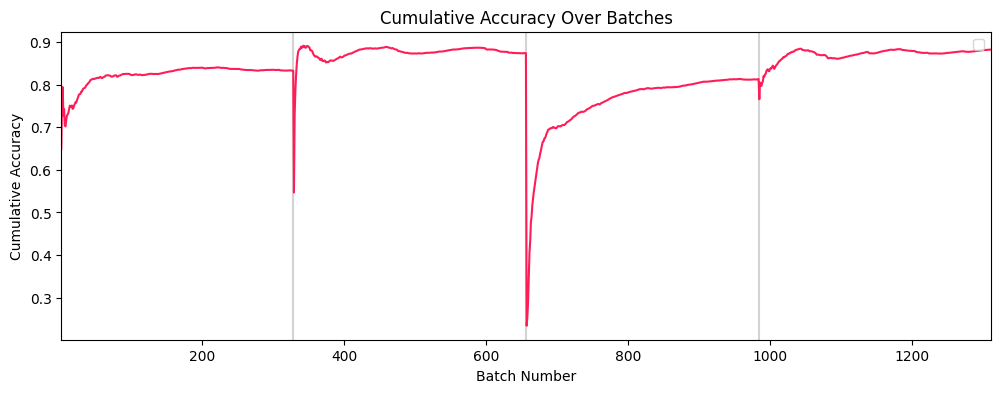

/Users/reza/Documents/GitHub/cPB/Models/cPB.py:435: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


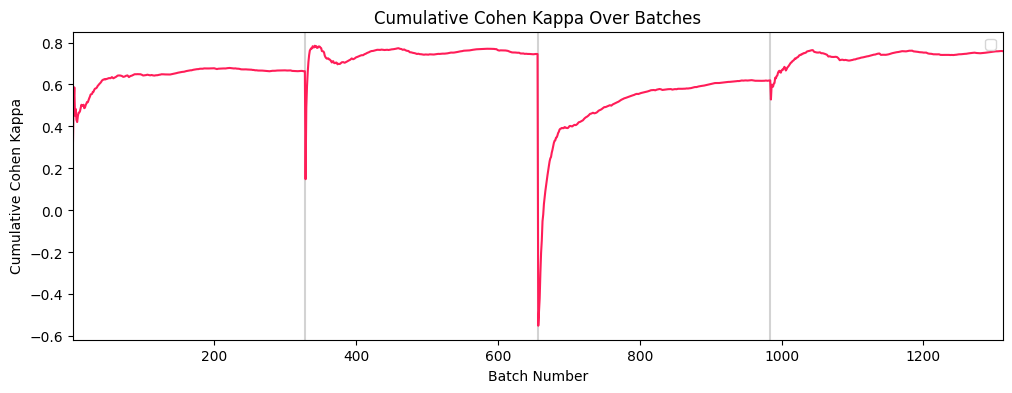

In [10]:
model = cPB(lr = lr ,hidden_size = hidden_size, seq_len = seq_len,base_model = base_model, pretrain_model_addr = pretrain_model_addr,
           mask_weights = mask_weights, mask_init = mask_init, number_of_tasks = number_of_tasks, epoch_size = epoch_size,
           input_size = input_size, mask_option = mask_option, model_type = model_type, batch_first = batch_first, low_rank = low_rank)


for iter in range(0,iteration):
  # loop for each task
  for task in range(1, df["task"].max() + 1):
    df_task = df[df["task"] == task]
    df_task = df_task.drop(columns="task")
    # loop based on each batch of data
    batch_cont=0
    model.weights_copy(task)
    for i in range(0, len(df_task), batch_size):
      x = df_task.iloc[i : i + batch_size, 0:-1].values.astype(np.float32)
      y = list(df_task.iloc[i : i + batch_size, -1])
      if batch_cont<mask_selection_NofBatch:
        for mask_index in range (0, task):
          model.predict_many(x,y,mask_index,task,mask_selection=True)
          model.learn_many(x,y,mask_index)
        batch_cont+=1
      elif batch_cont==mask_selection_NofBatch:
        best_mask_index=model.add_new_column(task)
        model.predict_many(x,y,best_mask_index,task,mask_selection=False)
        model.learn_many(x,y,best_mask_index)
        batch_cont+=1
      elif batch_cont>mask_selection_NofBatch:
        batch_cont+=1
        model.predict_many(x,y,best_mask_index,task,mask_selection=False)
        model.learn_many(x,y,best_mask_index)
    model.save_final_metrics(task,best_mask_index)
    model.final_weights_saving()
  model.plotting()


file_path = f'Performance/Results/{model_type}/{dataset}/Periodic/pretrain_T{Pretrain_task}_{base_model}-{dataset_name}-hidden{hidden_size}-epoch10-Mask_{mask_option}-iter{iteration}.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(model.performance, file)

file_path = f'Performance/Results/{model_type}/{dataset}/Periodic/pretrain_T{Pretrain_task}_{base_model}-{dataset_name}-hidden{hidden_size}-epoch10-Mask_{mask_option}-iter{iteration}_selectedMask.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(model.selected_mask_index, file)
    
    
file_path=f'Performance/Final Models/{model_type}/{base_model}/{dataset}/{dataset}-{base_model}-pretrain-hidden{hidden_size}-epoch10-Mask_{mask_option}-itter{iteration}.pickle'
with open(file_path, 'wb') as file:
    pickle.dump(model.all_models_weight, file)



In [ ]:
list of accuracies that used for evaluating and selecting the models =  [0.77875]
list of kappa values that used for evaluating and selecting the models =  [0.55682867]
index of selcted mask for this task 0
All batches Accuracy=  0.8415888979773944
All batches cohen kappa=  0.6817642093079573
list of accuracies that used for evaluating and selecting the models =  [0.8825     0.78921875]
list of kappa values that used for evaluating and selecting the models =  [0.75827483 0.56541348]
index of selcted mask for this task 0
All batches Accuracy=  0.904547841686496
All batches cohen kappa=  0.8054125549771437
list of accuracies that used for evaluating and selecting the models =  [0.50046875 0.45       0.6865625 ]
list of kappa values that used for evaluating and selecting the models =  [ 0.00623575 -0.09710056  0.36576066]
index of selcted mask for this task 2
All batches Accuracy=  0.7368591054431886
All batches cohen kappa=  0.465597555778137
list of accuracies that used for evaluating and selecting the models =  [0.68984375 0.60890625 0.838125   0.77828125]
list of kappa values that used for evaluating and selecting the models =  [0.38664967 0.22596661 0.68076873 0.56018686]
index of selcted mask for this task 2
All batches Accuracy=  0.8559288555919097
All batches cohen kappa=  0.7082464730866799